In [1]:
%load_ext nb_black

import pandas as pd
import numpy as np
import warnings
from matplotlib import pyplot as plt
from sklearn import metrics as m
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE  # doctest: +NORMALIZE_WHITESPACE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from collections import Counter

warnings.filterwarnings("ignore")
randomseed = 7

Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [14]:
data_test1 = pd.read_csv("companytestdata/CLASS 0.csv").dropna()
conditions = [
    (data_test1.L100800 < 100),
    (data_test1.L100800 >= 100) & (data_test1.L100800 < 126),
    (data_test1.L100800 >= 126),
]
choices = [0, 1, 2]
data_test1["CLASS"] = np.select(conditions, choices, default=0)

data_test2 = pd.read_csv("companytestdata/CLASS 1.csv").dropna()
data_test3 = pd.read_csv("companytestdata/CLASS 2.csv").dropna()

data = pd.read_csv("companytestdata/studyDATA_withCat.csv").dropna()

print(data.shape)
# datatest.head()
# print(data.columns)

data_test1.head()

(4224, 13)


,FIELD_1,FIELD_2,AGE,B_DAY,SEX,FIELD_31,FIELD_33,FIELD_38,FIELD_40,L100700,L100800,L101700,L103000,L104600,S000300,CLASS
0,1037483,20140614,49.0,650717.0,1.0,0.0,1.0,1.0,1.0,3.0,98.0,20.0,193.0,4.90,19.8,0
3,1037494,20170718,52.0,650717.0,0.0,0.0,2.0,2.0,0.0,6.8,94.0,54.0,101.0,5.17,24.2,0
8,1037502,20170519,52.0,650717.0,0.0,0.0,3.0,2.0,3.0,7.0,89.0,23.0,71.0,5.39,22.8,0
22,1037630,20131122,48.0,650715.0,1.0,0.0,1.0,0.0,2.0,3.2,89.0,10.0,92.0,5.30,21.5,0
23,1037630,20141217,49.0,650715.0,1.0,0.0,1.0,0.0,0.0,4.2,85.0,13.0,60.0,5.50,22.5,0


<IPython.core.display.Javascript object>

In [3]:
diabetic = data[data.CLASS == 2].dropna()
prediabetic = data[data.CLASS == 1].dropna()
normal = data[data.CLASS == 0].dropna()

print(diabetic.shape[0], prediabetic.shape[0], normal.shape[0])

train = pd.concat(
    [
        diabetic,
        prediabetic.sample(diabetic.shape[0], random_state=randomseed),
        normal.sample(diabetic.shape[0], random_state=randomseed),
    ]
)

xtrain = train[
    [
        "AGE",
        "FIELD_31",
        "FIELD_33",
        "FIELD_38",
        "FIELD_40",
        "L100700",
        "L101700",
        "L103000",
        "L104600",
        "S000300",
        "SEX",
    ]
]
ytrain = train[["CLASS"]]

158 822 3244


<IPython.core.display.Javascript object>

In [4]:
print(
    data_test1.dropna().sample(200, random_state=randomseed).shape[0],
    data_test2.dropna().sample(200, random_state=randomseed).shape[0],
    data_test3.dropna().sample(200, random_state=randomseed).shape[0],
)

test = pd.concat(
    [
        data_test1.dropna().sample(200, random_state=randomseed),
        data_test2.dropna().sample(200, random_state=randomseed),
        data_test3.dropna().sample(200, random_state=randomseed),
    ]
)

test = test.dropna()

xtest = test[
    [
        "AGE",
        "FIELD_31",
        "FIELD_33",
        "FIELD_38",
        "FIELD_40",
        "L100700",
        "L101700",
        "L103000",
        "L104600",
        "S000300",
        "SEX",
    ]
]
ytest = test[["CLASS"]]

200 200 200


<IPython.core.display.Javascript object>

In [5]:
# diabetic_test = diabetic.sample(200, random_state=randomseed)
# prediabetic_test = prediabetic.sample(200, random_state=randomseed)
# normal_test = normal.sample(200, random_state=randomseed)
# test = pd.concat([diabetic_test, prediabetic_test, normal_test])

# diabetic_train = diabetic.drop(diabetic_test.index)
# prediabetic_train = prediabetic.drop(prediabetic_test.index).sample(
#     2 * diabetic_train.shape[0], random_state=randomseed
# )
# normal_train = normal.drop(normal_test.index).sample(
#     2 * diabetic_train.shape[0], random_state=randomseed
# )
# train = pd.concat([diabetic_train, diabetic_train, prediabetic_train, normal_train])

<IPython.core.display.Javascript object>

In [6]:
# xtrain = train.iloc[:, 3:-2]
# ytrain = train.iloc[:, -1]
# xtest = test.iloc[:, 3:-2]
# ytest = test.iloc[:, -1]

<IPython.core.display.Javascript object>

In [7]:
# x = data.iloc[:, 3:-2]
# y = data.iloc[:, -1]

# xtrain, xtest, ytrain, ytest = train_test_split(
#     x, y, random_state=randomseed, test_size=0.2
# )

# sm = SMOTE(random_state=randomseed)
# X_res, y_res = sm.fit_resample(xtrain, ytrain)

# print("Resampled dataset shape %s" % Counter(y_res))
# print(
#     y_res[y_res == 0].shape[0], y_res[y_res == 1].shape[0], y_res[y_res == 2].shape[0]
# )
# print(X_res.shape, y_res.shape)

# xtrain = X_res
# ytrain = y_res

# # y_res2 = y_res.copy()
# # from keras.utils import to_categorical
# # y_res2 = to_categorical(y_res)

# # xtrain, xtest, ytrain, ytest = train_test_split(
# #     X_res, y_res2, random_state=randomseed, test_size=0.2
# # )

<IPython.core.display.Javascript object>

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    random_state=randomseed,
    n_estimators=100,
    max_depth=12,
    min_samples_split=2,
    min_samples_leaf=10,
    max_features="auto",
)
rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=7, verbose=0,
                       warm_start=False)

<IPython.core.display.Javascript object>

0.6716666666666666


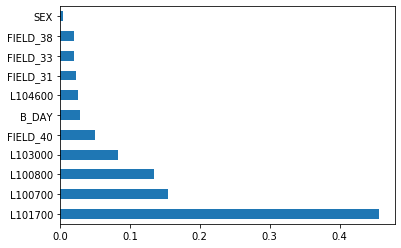

Index(['L101700', 'L100700', 'L100800', 'L103000', 'FIELD_40', 'B_DAY',
       'L104600', 'FIELD_31', 'FIELD_33', 'FIELD_38', 'SEX'],
      dtype='object')


<IPython.core.display.Javascript object>

In [9]:
ypred = rf.predict(xtest)

score = rf.score(xtest, ytest)
print(score)

feat_importances = pd.Series(rf.feature_importances_, index=test.iloc[:, 3:-2].columns)
feat_importances.nlargest(16).plot(kind="barh")
plt.show()

print(feat_importances.nlargest(16).index)

In [10]:
print("Accuracy on training set: {:.3f}".format(rf.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

confmatrx = pd.DataFrame(m.confusion_matrix(ytest, ypred))
confmatrx.head()

Accuracy on training set: 0.757
Accuracy on test set: 0.672


,0,1,2
0,157,28,5
1,88,84,38
2,15,23,162


<IPython.core.display.Javascript object>

In [11]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.60      0.83      0.70       190
           1       0.62      0.40      0.49       210
           2       0.79      0.81      0.80       200

    accuracy                           0.67       600
   macro avg       0.67      0.68      0.66       600
weighted avg       0.67      0.67      0.66       600



<IPython.core.display.Javascript object>

In [12]:
import xgboost as xgb
from sklearn import metrics as m

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=randomseed)

xgb_model.fit(xtrain, ytrain)

y_pred = xgb_model.predict((xtest))

print("accuracy \t", m.accuracy_score(ytest, y_pred))
confmatrx = pd.DataFrame(m.confusion_matrix(ytest, y_pred))
confmatrx.head()

accuracy 	 0.6


,0,1,2
0,171,11,8
1,134,37,39
2,33,15,152


<IPython.core.display.Javascript object>

In [13]:
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.90      0.65       190
           1       0.59      0.18      0.27       210
           2       0.76      0.76      0.76       200

    accuracy                           0.60       600
   macro avg       0.62      0.61      0.56       600
weighted avg       0.62      0.60      0.55       600



<IPython.core.display.Javascript object>

In [ ]:
# =====================================
pred5 = rf.predict((data5.iloc[:, 3:-2]))

# temp=data5.iloc[:,3:-2]
# temp.columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']
# pred5= xgb_model.predict((temp))

print(m.accuracy_score(data5.iloc[:, -1], pred5))

confmatrx = pd.DataFrame(m.confusion_matrix(data5.iloc[:, -1], pred5))
confmatrx

In [ ]:
print(classification_report(data5.iloc[:, -1], pred5))

In [ ]:
# ========================================================

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(xtrain, ytrain)

In [ ]:
y_pred = neigh.predict((xtest))

print("accuracy \t", m.accuracy_score(ytest, y_pred))
confmatrx = pd.DataFrame(m.confusion_matrix(ytest, y_pred))
confmatrx.head()

In [ ]:
pred5 = neigh.predict((data5.iloc[:, 3:-2]))


print(m.accuracy_score(data5.iloc[:, -1], pred5))

confmatrx = pd.DataFrame(m.confusion_matrix(data5.iloc[:, -1], pred5))
confmatrx